In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/home/isidro/Documents/github/SimpleMC/")
from simplemc.plots.plot_Quintom_variables import *
from simplemc.models.QuintomCosmology import QuintomCosmology
from simplemc.models.LCDMCosmology import LCDMCosmology
from simplemc.cosmo.Parameter import Parameter

%matplotlib inline

Initalizing nu density look up table... Done


In [2]:
om_ = Parameter("Om", 0.3038, 0.05, (0.1, 0.5), "\Omega_m")
obh2_ = Parameter("Obh2", 0.02234, 0.001, (0.02, 0.025), "\Omega_{b}h^2")
h_ = Parameter("h", 0.6821, 0.05, (0.4, 0.9), "h")
mquin_ = Parameter("mquin", 1.7, 0.2, (0, 4.0), "m_{\phi}")
mphan_ = Parameter("mphan", 0.8, 0.2, (0, 3.0), "m_{\psi}")
iniphi_ = Parameter("iniphi", 0.5, 0.1, (0, 1.5), "\phi_0")
coupling_ = Parameter("beta",  1.0, 0.5, (-10, 10), "\\beta")

In [70]:
minim, maxim = (0.1, 2.5)
steps = 9
step = (maxim-minim)/steps

T = QuintomCosmology(vary_mquin=True)

zz = []
ww = []
PP = []
dd = []

mquin_data = np.arange(0, 4, 0.5)

for val in mquin_data:
#     if fname == 'Quintessence':
    mquin_.setValue(val)
    T.updateParams([mquin_])

    T.call_functions()
    zl = np.arange(0.0, 2.5, 0.05)
    ww.append([T.w_de(1./(1+z)) for z in zl])
    T.initialize()
    dd.append([T.solution])
    PP.append(i)
    zz.append(zl)

In [71]:
np.shape(ww), np.shape(mquin_data), np.shape(zl), np.shape(zz)

((8, 50), (8,), (50,), (8, 50))

(-1.05, 1.0)

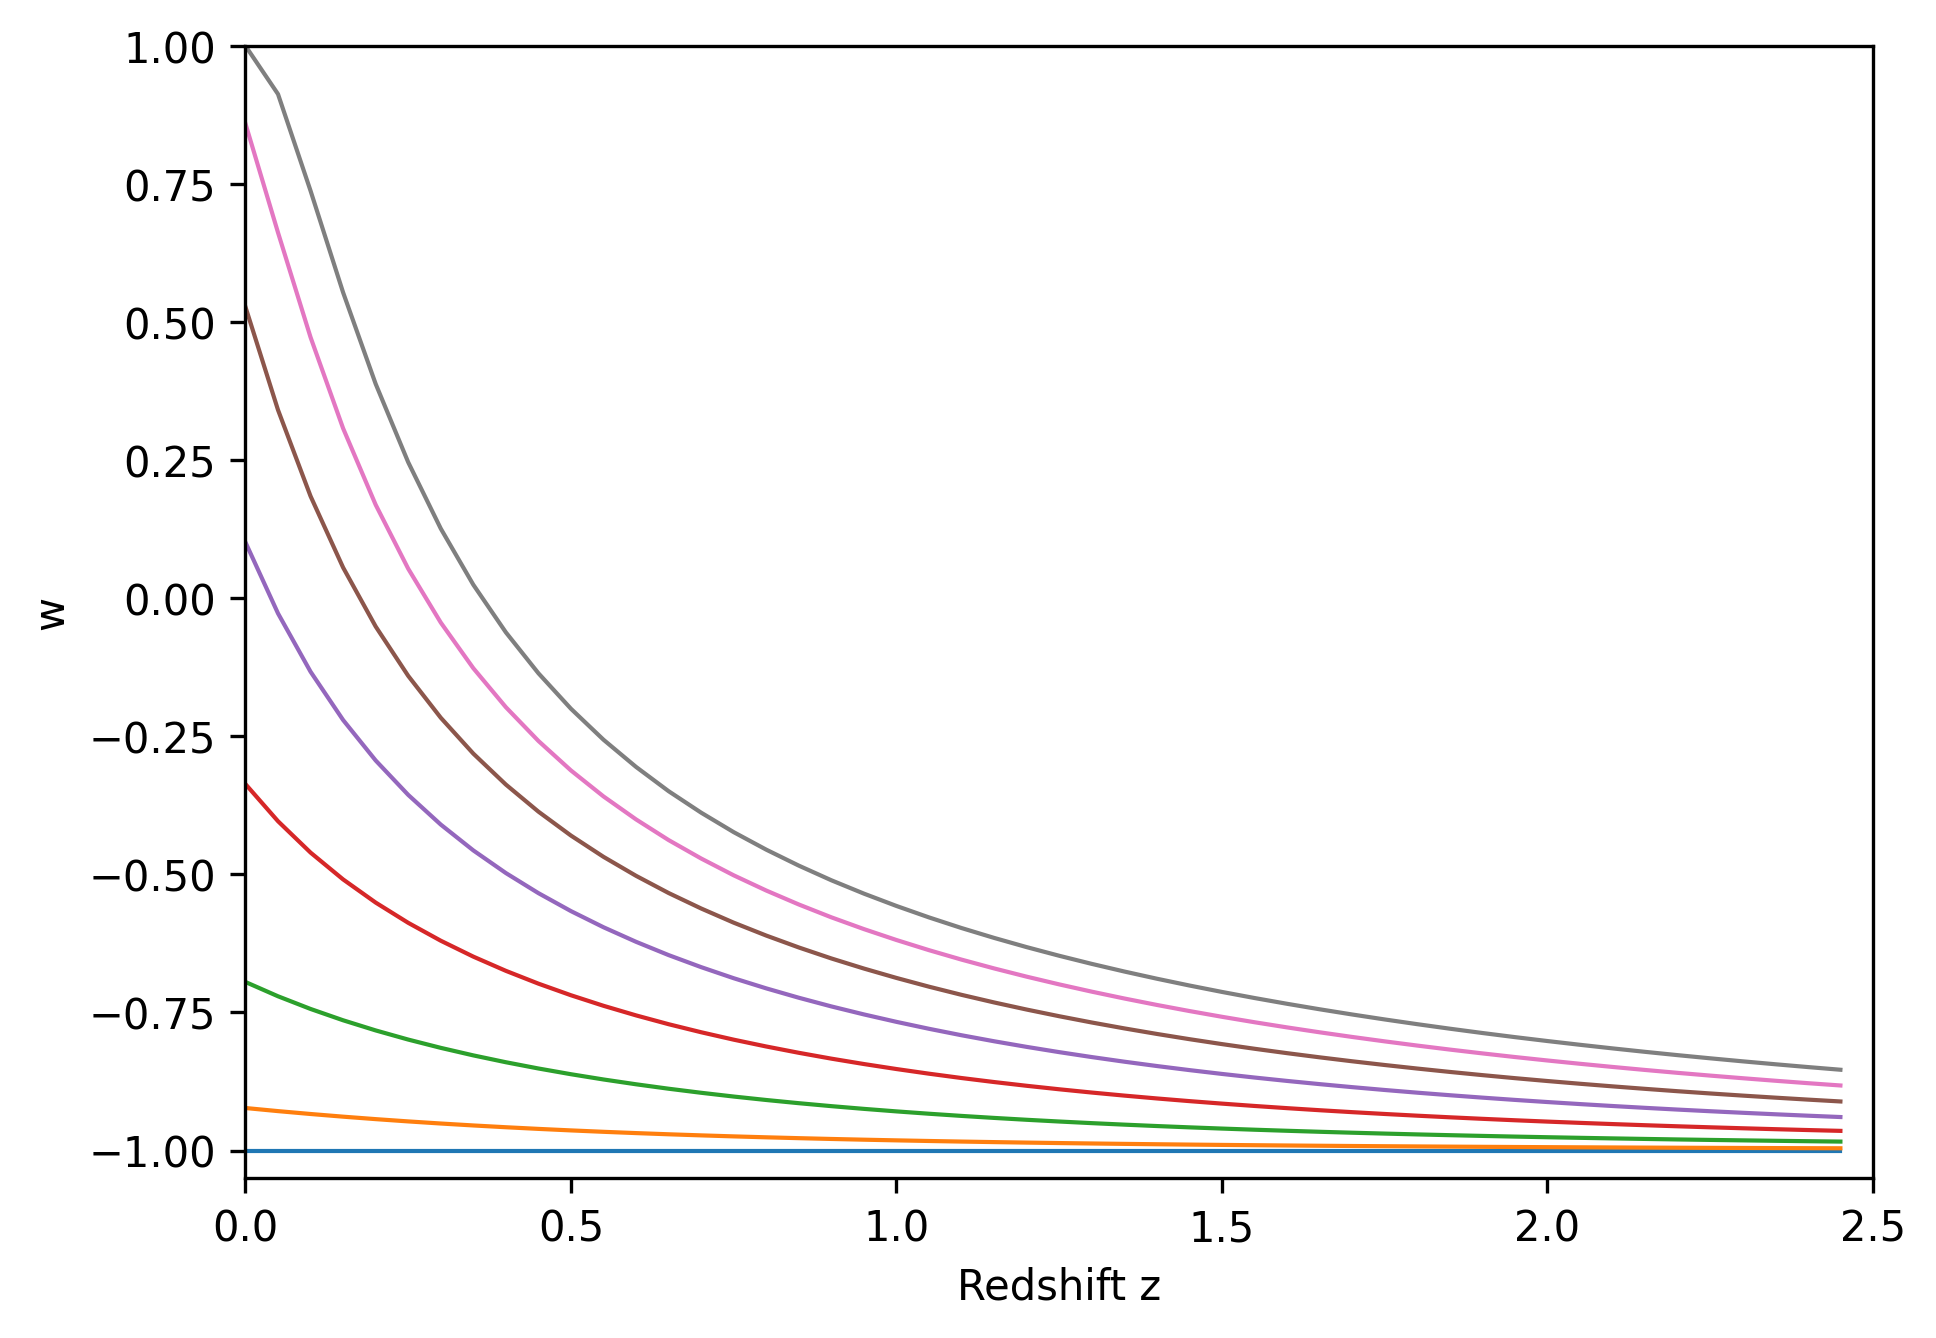

In [72]:
fig = plt.figure(figsize=(7,5), dpi=300)

for line in ww:
    plt.plot(zl, line, alpha=1, lw=1)

plt.xlabel("Redshift z")
plt.ylabel("w")
plt.xlim(0, 2.5)
plt.ylim(-1.05, 1)
# plt.hlines(-1, xmin=0, xmax=3.05, colors='red',  linestyles='dashed', label='$w=-1$', lw=3, alpha=1)